In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e26ff83dd82342d6b04e4ee2cca729cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jquSalqO2KPjYu7DcjyVkaz2AOvtpPtqm1VCXqku8Kfh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e26ff83dd82342d6b04e4ee2cca729cd.get_object(Bucket='mlr-donotdelete-pr-mcquuupmzu4aj5',Key='air _quality3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Ozone,Solar Radiation,Wind,Temp,Month,Day
0,17.0,13.04,2.25,66,1,9
1,17.0,13.13,2.25,66,1,30
2,17.0,13.24,2.25,66,1,14
3,18.0,13.69,2.25,67,1,4
4,18.0,13.78,2.25,67,1,15


In [3]:
dataset=dataset.iloc[:,0:6]

In [4]:
dataset

,Ozone,Solar Radiation,Wind,Temp,Month,Day
0,17.0,13.04,2.25,66,1,9
1,17.0,13.13,2.25,66,1,30
2,17.0,13.24,2.25,66,1,14
3,18.0,13.69,2.25,67,1,4
4,18.0,13.78,2.25,67,1,15
5,18.0,13.78,2.25,67,1,17
6,18.0,13.80,2.25,67,1,29
7,19.0,14.43,2.25,67,1,8
8,20.0,14.82,2.30,67,1,11
9,20.0,14.92,2.80,67,1,18


In [5]:
dataset.isnull().any()

Ozone               True
Solar Radiation     True
Wind               False
Temp               False
Month              False
Day                False
dtype: bool

In [6]:
dataset.fillna(dataset.mean(),inplace=True)

In [7]:
dataset.isnull().any()

Ozone              False
Solar Radiation    False
Wind               False
Temp               False
Month              False
Day                False
dtype: bool

In [8]:
y=dataset.iloc[:,0].values

In [9]:
y

array([  17.        ,   17.        ,   17.        ,   18.        ,
         18.        ,   18.        ,   18.        ,   19.        ,
         20.        ,   20.        ,   20.        ,   20.        ,
         20.        ,   21.        ,   21.        ,   21.        ,
         21.        ,   21.        ,   21.        ,   21.        ,
         21.        ,   22.        ,   23.        ,   23.        ,
         23.        ,   23.        ,   23.        ,   23.        ,
         23.        ,   23.        ,   23.        ,   27.        ,
         27.        ,   27.        ,   27.        ,   27.        ,
         27.        ,   28.        ,   28.        ,   28.        ,
         28.        ,   28.        ,   28.        ,   28.        ,
         28.        ,   28.        ,   28.        ,   28.        ,
         29.        ,   29.        ,   29.        ,   29.        ,
         29.        ,   29.        ,   29.        ,   30.        ,
         30.        ,   30.        ,   30.        ,   58.     

In [10]:
x=dataset.iloc[:,1:].values

In [11]:
x

array([[ 13.04,   2.25,  66.  ,   1.  ,   9.  ],
       [ 13.13,   2.25,  66.  ,   1.  ,  30.  ],
       [ 13.24,   2.25,  66.  ,   1.  ,  14.  ],
       ..., 
       [ 12.29,   2.25,  65.  ,  12.  ,   3.  ],
       [ 12.62,   2.25,  65.  ,  12.  ,  20.  ],
       [ 12.95,   2.25,  66.  ,  12.  ,  10.  ]])

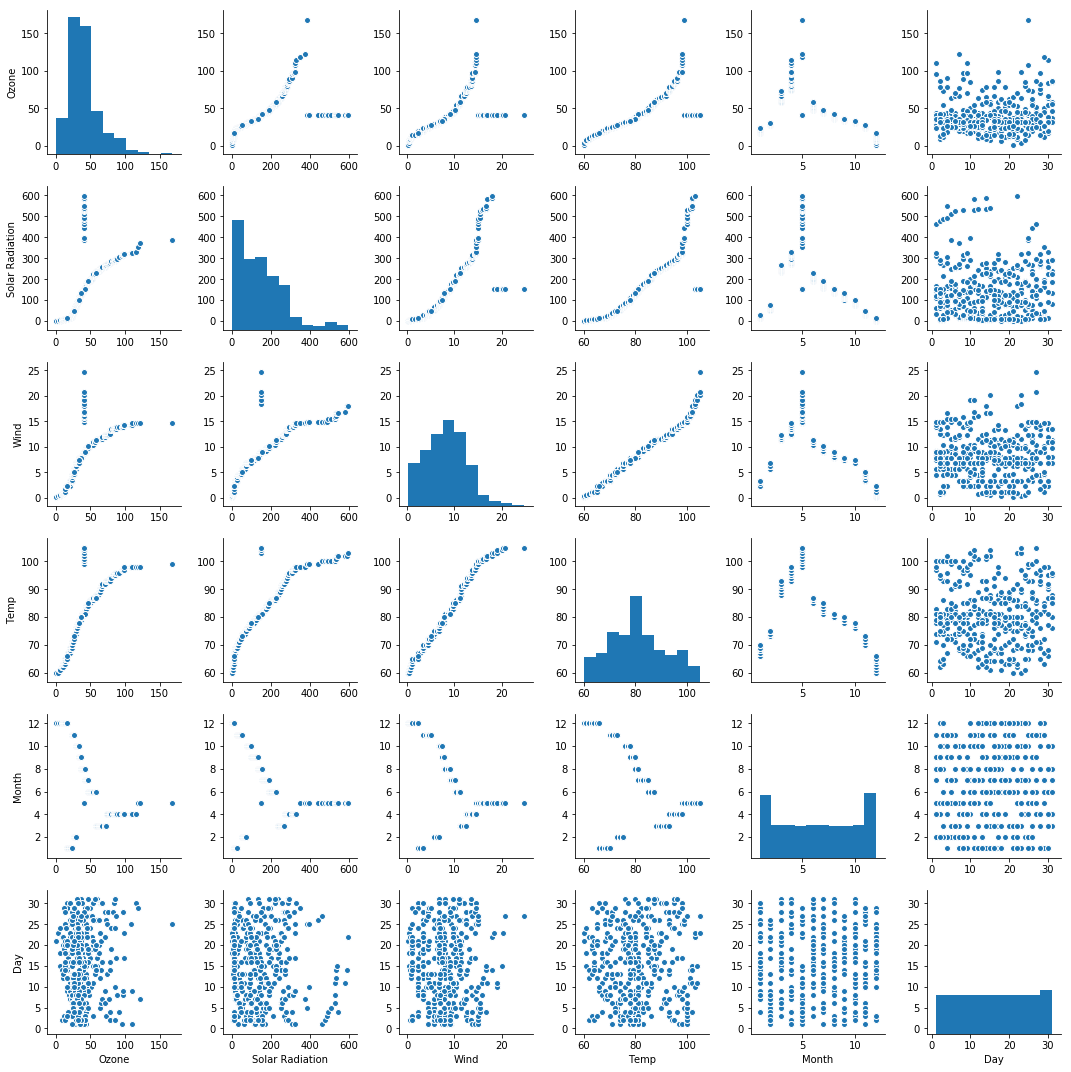

In [12]:
sns.pairplot(dataset)

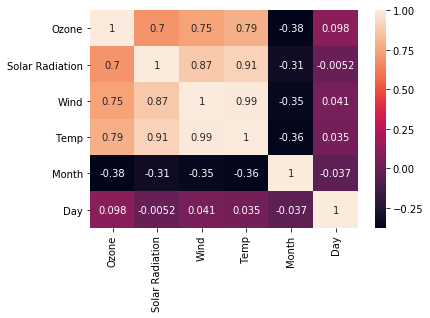

In [13]:
sns.heatmap(dataset.corr(),annot=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [18]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_pred = rf.predict(x_test)

In [20]:
r2_score(y_test,y_pred)

0.96568034339250708

In [21]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (4.19.5)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not directly

In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-27 09:13:42,194 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [23]:
wml_credential={
    "instance_id": "f4371351-22cc-4f6d-87cc-73c2cc3afc56",
    "password": "133a16db-7212-4bf6-8e09-7fc553a1fbda",
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "username": "fce5adfa-eaea-4a12-9e80-42350ae2d473",
    "apikey": "tpN9VTIZ_DNXmVqBpqB8vId5VT6OW_r0crljs12bW2im"
}

In [24]:
client=WatsonMachineLearningAPIClient(wml_credential)

In [25]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "abc", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "abc", 
               client.repository.ModelMetaNames.NAME: "MyModel"}

In [26]:
model_artifact=client.repository.store_model(rf, meta_props=model_props)

In [27]:
client.repository.list()

------------------------------------  ------------  ------------------------  -----------------  -----------------
GUID                                  NAME          CREATED                   FRAMEWORK          TYPE
17463e00-5740-4619-9175-61ce60aa0ef7  MyModel       2019-06-27T09:13:42.759Z  scikit-learn-0.19  model
791b8671-84b0-499a-adc6-5608cdf6f09a  MyModel       2019-06-27T06:36:53.356Z  scikit-learn-0.19  model
7303ffbf-c001-4088-b5b2-f8a4c00086c6  MyModel       2019-06-27T06:35:38.366Z  scikit-learn-0.19  model
91ada062-cbd3-4814-9068-5f28d4907daf  MyModel       2019-06-27T06:31:26.855Z  scikit-learn-0.19  model
c4410fa6-c87e-4c17-8de1-105987dd3e12  MyModel       2019-06-27T06:01:24.173Z  scikit-learn-0.19  model
7178a88e-2be8-461c-9c75-b6d1bc385228  MyModel       2019-06-23T14:12:31.378Z  scikit-learn-0.19  model
195d23c2-2440-459b-a12b-cb5d7ea026fc  MyModel       2019-06-21T10:54:34.408Z  scikit-learn-0.19  model
8c331990-276f-489d-ae12-779d0023731f  MyModel       2019-06-21

In [28]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [29]:
created_deployment = client.deployments.create(published_model_uid, name="MyDeployment")



#######################################################################################

Synchronous deployment creation for uid: '17463e00-5740-4619-9175-61ce60aa0ef7' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0c47ad76-88d4-47e8-8e56-3441e8f7e1c4'
------------------------------------------------------------------------------------------------




In [30]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f4371351-22cc-4f6d-87cc-73c2cc3afc56/deployments/0c47ad76-88d4-47e8-8e56-3441e8f7e1c4/online
